In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay


In [ ]:
df=pd.read_csv('/content/Iris.csv')

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.shape

(150, 6)

In [ ]:
df.size

900

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
x=df.iloc[:,1:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y=df.iloc[:,-1]
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
ohe = OneHotEncoder(sparse_output=False)
y_encoded = ohe.fit_transform(y.values.reshape(-1, 1))
print("Shape:", y_encoded.shape)
print("Example encoding:\n", y_encoded[:5])

Shape: (150, 3)
Example encoding:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
print(ohe.categories_)

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]


In [ ]:
y_df = pd.DataFrame(y_encoded, columns=ohe.categories_[0])
print(y_df.head())

   Iris-setosa  Iris-versicolor  Iris-virginica
0          1.0              0.0             0.0
1          1.0              0.0             0.0
2          1.0              0.0             0.0
3          1.0              0.0             0.0
4          1.0              0.0             0.0


In [ ]:
m=MinMaxScaler()

In [ ]:
x_m=m.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_m,y_df,test_size=0.3)

In [ ]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(105, 4) (45, 4)
(105, 3) (45, 3)


In [ ]:
k=KNeighborsClassifier()
k.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=k.predict(x_test)

In [ ]:
y_pred

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
y_test

,Iris-setosa,Iris-versicolor,Iris-virginica
124,0.0,0.0,1.0
119,0.0,0.0,1.0
47,1.0,0.0,0.0
140,0.0,0.0,1.0
123,0.0,0.0,1.0
83,0.0,1.0,0.0
82,0.0,1.0,0.0
13,1.0,0.0,0.0
87,0.0,1.0,0.0
109,0.0,0.0,1.0


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        18

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45
 samples avg       0.96      0.96      0.96        45



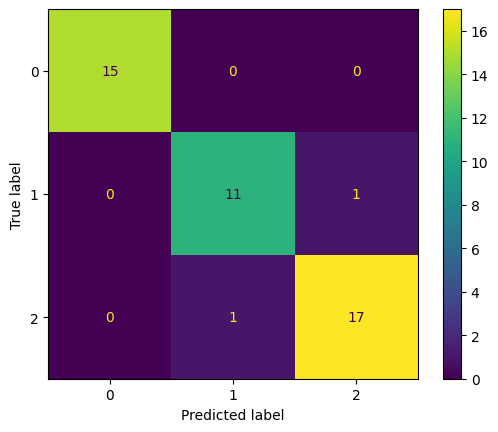

In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
print(ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels))

In [ ]:
from sklearn.model_selection import GridSearchCV
p={'n_neighbors':[1,3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
t=GridSearchCV(k,p,cv=5,scoring='accuracy')
t.fit(x_train,y_train)
print(t.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
kt=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto')
kt.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
kt=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto')
kt.fit(x_train,y_train)
y_kt=kt.predict(x_test)
print(classification_report(y_test,y_kt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.85      0.92      0.88        12
           2       0.94      0.89      0.91        18

   micro avg       0.93      0.93      0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45
 samples avg       0.93      0.93      0.93        45



In [ ]:
new_df = m.transform([[52, 1, 212, 125]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_new=kt.predict(new_df)
y_new

array([[0., 0., 1.]])

In [ ]:
import pickle
pickle.dump(kt,open('iris_model_knn.sav1','wb'))
pickle.dump(m,open('iris_scaler_knn.sav1','wb'))